In [1]:
# By Gilmara Santos
# This notebook shows how to use litstudy from inside a Jupyter notebook. It shows how to load a dataset, 
#plot statistics, perform topic modeling, do network analysis, and other features.

# This notebook focuses on doing a systematic literature review with topics on research that use Fog Computing solutions 
#for Sustainable IoT data management

# Import other libraries 
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')
#plt.style.use('fast')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

In [2]:
# For the scope of this research, the CAPES journal portal was adopted as a data source, 
#therefore, the research will take place in the following digital libraries: IEEE Xplore, Springer Link, 
#Web of Science - Coleção Principal (Clarivate Analytics).

# Load the CSV files
docs1 = litstudy.load_ieee_csv('data/export_IEEE.csv')
docs_ieee = docs1
print(len(docs_ieee), 'papers loaded from IEEE')

docs_springer = litstudy.load_springer_csv('data/SpringerLink.csv')
print(len(docs_springer), 'papers loaded from Springer')

doc_web_of_science = litstudy.load_bibtex('data/webOfScience.bib')
print(len(doc_web_of_science), 'papers loaded from Bibtex')

# Merge the three document sets (This option already removes duplicate articlesv - For more information
#see the DocumentSet class and its methods (union, intersection, merge) in the types file)
docs_csv = docs_ieee | docs_springer | doc_web_of_science
print(len(docs_csv), 'papers loaded from CSV')


51 papers loaded from IEEE
66 papers loaded from Springer
63 papers loaded from Bibtex
167 papers loaded from CSV


In [3]:
#To enhance the metadata, we can find the corresponding articles on Scopus using refine_scopus
import logging
logging.getLogger().setLevel(logging.CRITICAL)
#logging.getLogger().setLevel(logging.INFO)
logging.disable(logging.CRITICAL)
logging.disable(logging.WARNING)
logging.disable(logging.INFO)
logging.disable(logging.DEBUG)

# Refine using Scopus
docs_scopus, docs_notfound = litstudy.refine_scopus(docs_csv)
# print(len(docs_scopus), " found on Scopus, " , len(docs_notfound), " not found " )

print(len(docs_scopus), 'papers found on Scopus')
print(len(docs_notfound), 'papers were not found and were discarded')

 26%|███████████████▊                                            | 44/167 [00:01<00:02, 42.77it/s]D:\Liststudy\jupyterListstudy\lib\site-packages\litstudy\sources\scopus.py:230: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(f"no document found for DOI {doi}: {e}")
100%|███████████████████████████████████████████████████████████| 167/167 [00:09<00:00, 17.73it/s]

162 papers found on Scopus
5 papers were not found and were discarded


In [4]:
docs = docs_scopus.filter_docs(lambda d: d.publication_year >= 2019)

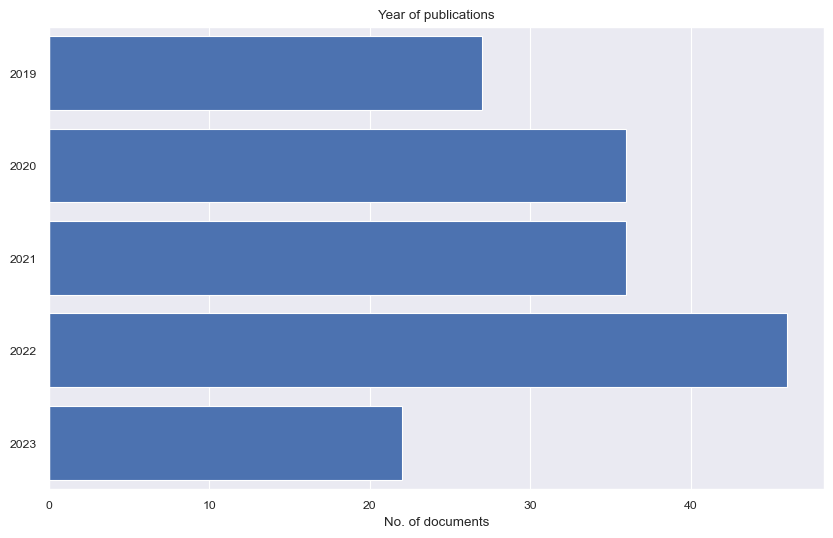

In [5]:
litstudy.plot_year_histogram(docs_csv);

In [6]:
df = pd.DataFrame(docs)
#csv_data_gilmara = df.to_csv(sep='|')
print('\nCSV String:\n', df)

df.to_csv('gilmaranovo.csv', sep='|')
#dt.to_csv('csv_data_gilmara.csv')


CSV String:
                                                      0
0    <KFIML: Kubernetes-Based Fog Computing IoT Pla...
1    <Auction mechanisms in cloud/fog computing res...
2    <A Novel Framework for Fog Computing: Lattice-...
3    <Privacy-Preserving Deduplication of Sensor Co...
4    <Privacy-Preserving Traffic Monitoring with Fa...
..                                                 ...
157  <Stackelberg game for service deployment of io...
158  <A comprehensive survey on software-defined ne...
159  <IoT registration and authentication in smart ...
160  <Edge-Computing-Enabled Smart Cities: A Compre...
161  <An empirical study on system level aspects of...

[162 rows x 1 columns]


In [7]:
print(len(docs), 'papers remaining')

162 papers remaining


<Axes: title={'center': 'Authors'}, xlabel='No. of documents'>

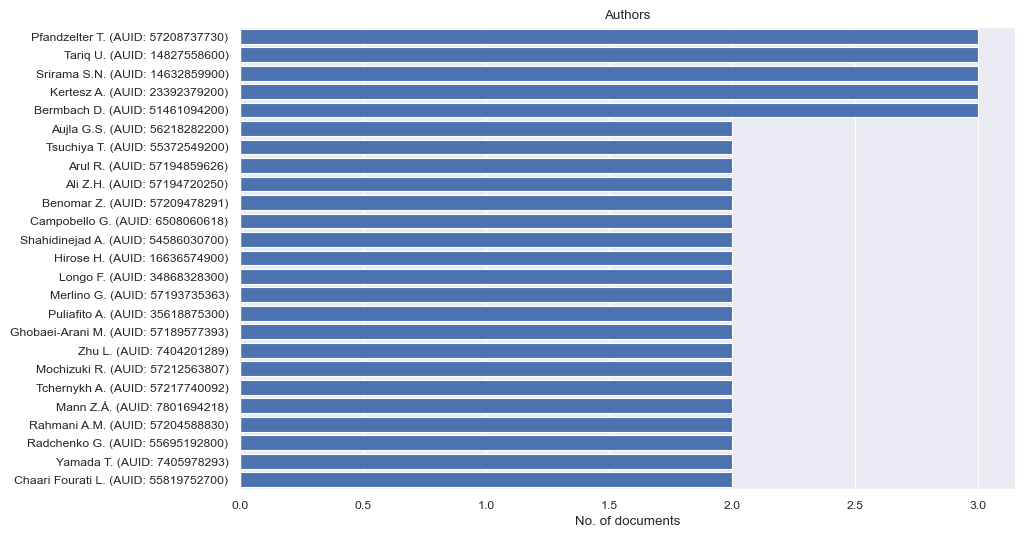

In [8]:
litstudy.plot_author_histogram(docs)

<Axes: title={'center': 'Affiliations'}, xlabel='No. of documents'>

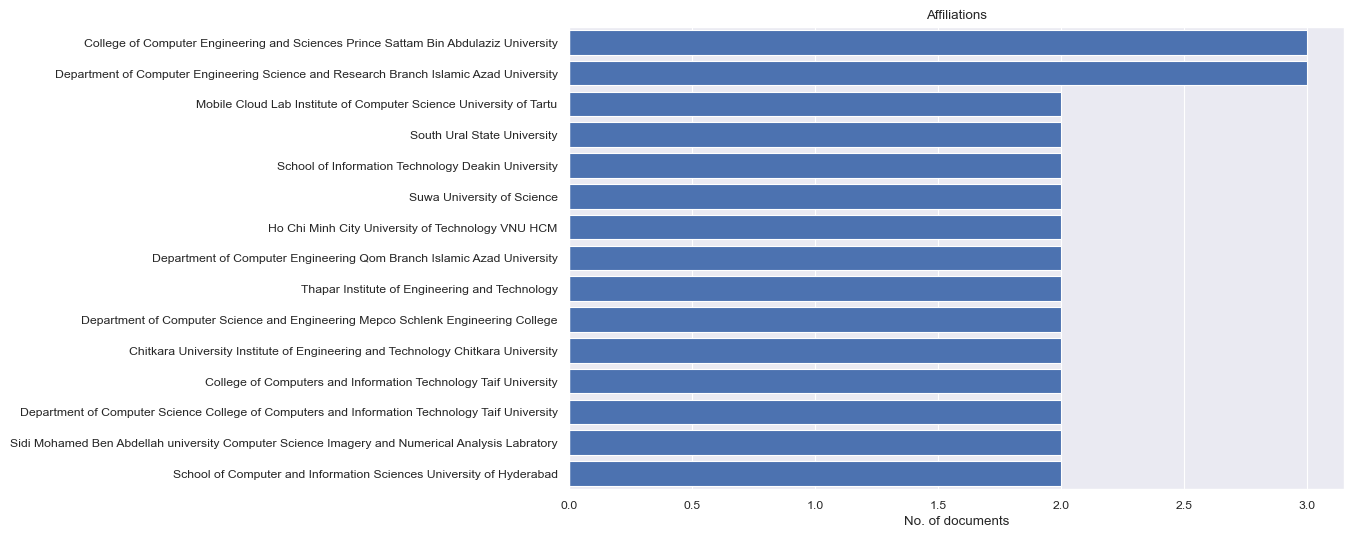

In [29]:
# This names are long, which is why a short abbreviation is provided.
mapping = {
    "IEEE International parallel and distributed processing symposium IPDPS": "IEEE IPDPS",
    "IEEE International parallel and distributed processing symposium workshops IPDPSW": "IEEE IPDPS Workshops",
}
litstudy.plot_affiliation_histogram(docs, limit =15)

<Axes: title={'center': 'Countries'}, xlabel='No. of documents'>

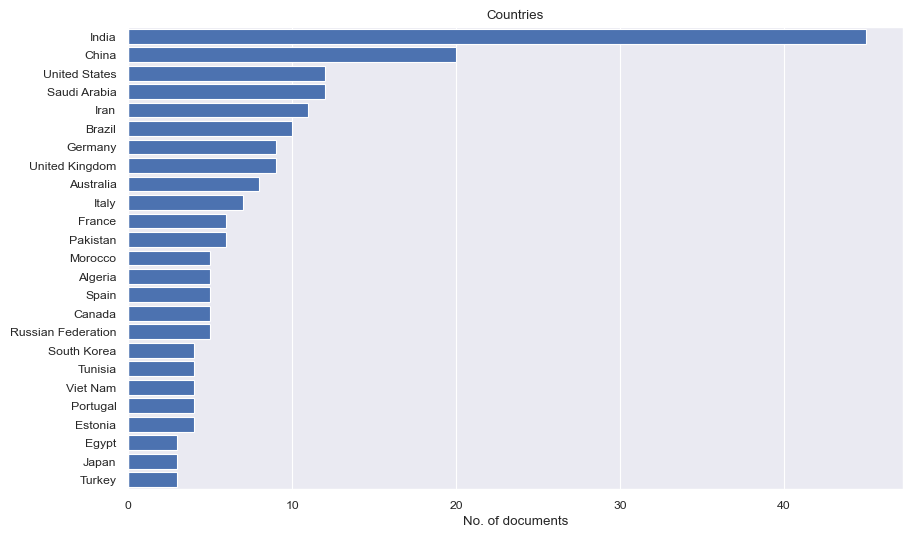

In [20]:
litstudy.plot_country_histogram(docs)

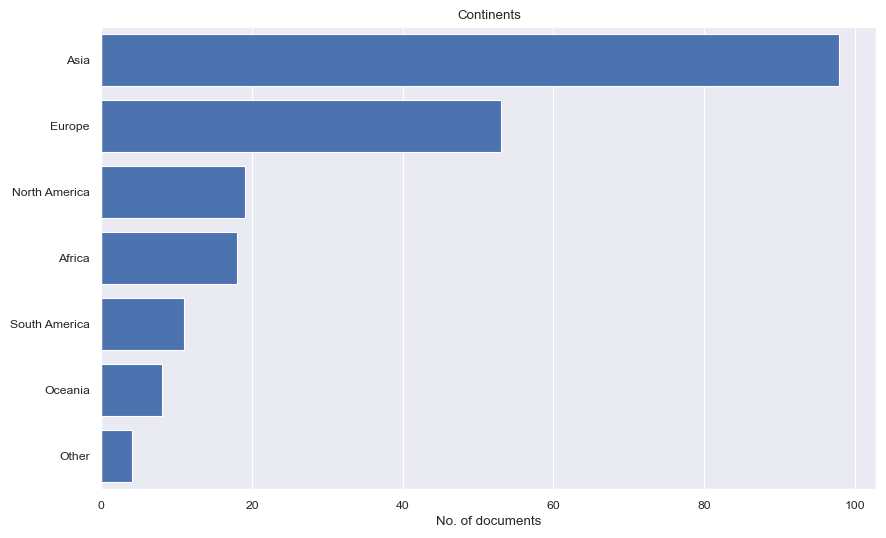

In [21]:
litstudy.plot_continent_histogram(docs);

In [43]:
corpus = litstudy.build_corpus(docs , ngram_threshold=0.6)

<Axes: xlabel='% of documents'>

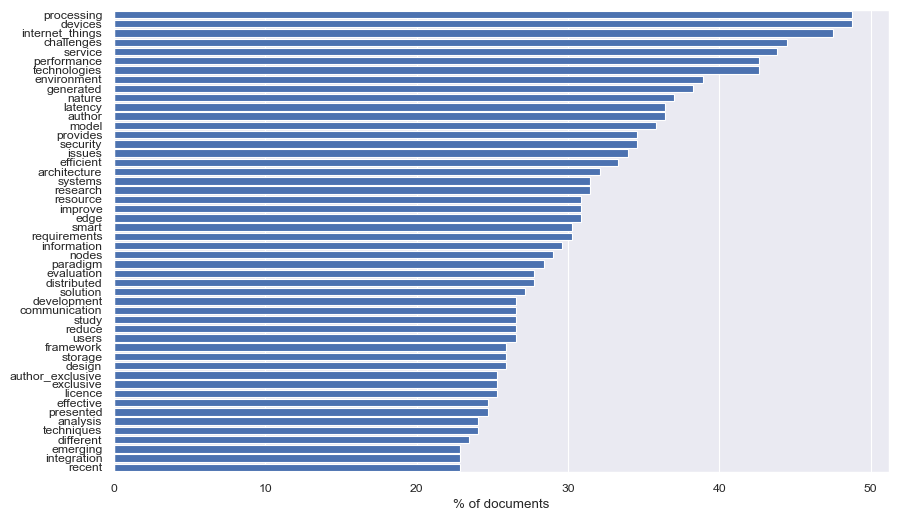

In [44]:
 litstudy.plot_word_distribution(corpus, limit=50) #Fig. 3

In [45]:
#corpus = litstudy.build_corpus(docs, ngram_threshold=0.8)
corpus = litstudy.build_corpus(docs, ngram_threshold=0.8)

In [46]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
artificial_intelligence,6
author_exclusive,41
business_media,22
defined_networking,6
energy_consumption,20
fault_tolerant,6
gmbh_austria,10
internet_things,77
john_wiley,5
licence_science,22


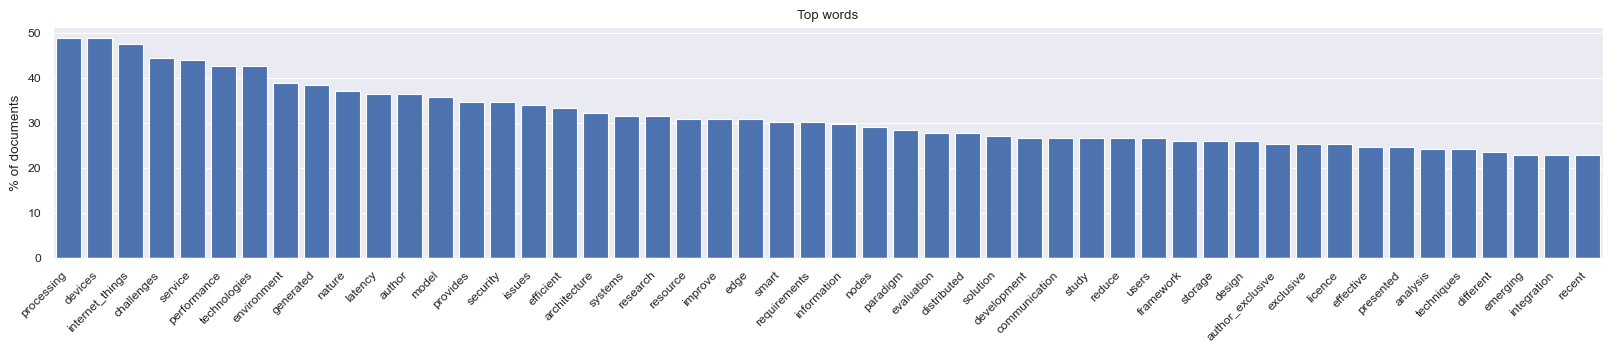

In [47]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45);

In [48]:
num_topics = 40
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

D:\Liststudy\jupyterListstudy\lib\site-packages\gensim\models\nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
D:\Liststudy\jupyterListstudy\lib\site-packages\gensim\models\nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
D:\Liststudy\jupyterListstudy\lib\site-packages\gensim\models\nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


In [49]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['offloading', 'scheme', 'centric', 'content', 'resource']
Topic 2: ['review', 'literature', 'systematic', 'study', 'research']
Topic 3: ['health', 'patients', 'ratio', 'monitoring', 'care']
Topic 4: ['stream', 'processing', 'scale', 'pipelines', 'benchmark']
Topic 5: ['social', 'trade', 'cost', 'adaptive', 'maximizing']
Topic 6: ['practices', 'step', 'testbed', 'edge', 'wiley']
Topic 7: ['events', 'flexibility', 'mechanism', 'function', 'adaptive']
Topic 8: ['features', 'platform', 'learning', 'model', 'machine_learning']
Topic 9: ['compression', 'edge', 'reduction', 'center', 'transfer']
Topic 10: ['transaction', 'blockchain', 'intelligent', 'scale', 'agent']
Topic 11: ['encryption', 'security', 'transfer', 'like', 'attacks']
Topic 12: ['scheduling', 'tasks', 'workflow', 'resource', 'priority']
Topic 13: ['authentication', 'scheme', 'security', 'attacks', 'lightweight']
Topic 14: ['fault_tolerant', 'fault', 'tolerant', 'dependability', 'qos']
Topic 15: ['blockchain', 'messag

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
D:\Liststudy\jupyterListstudy\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(

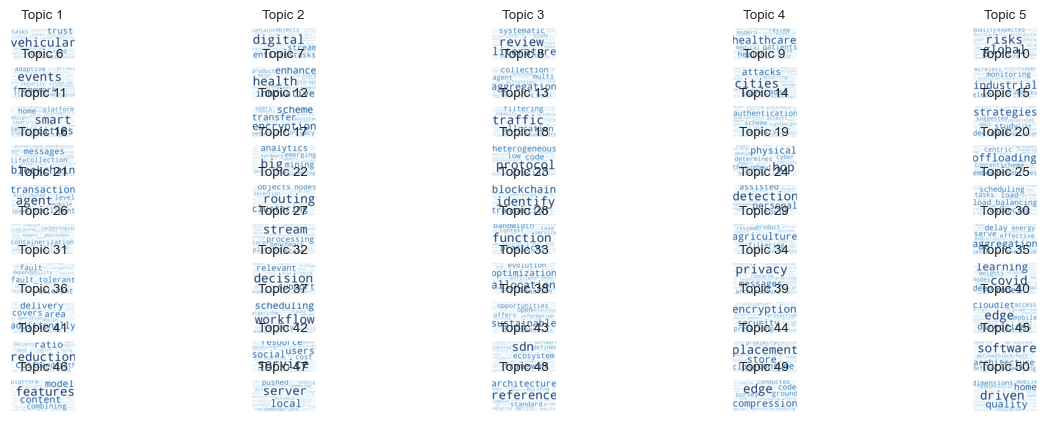

In [28]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

D:\Liststudy\jupyterListstudy\lib\site-packages\sklearn\manifold\_t_sne.py:841: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


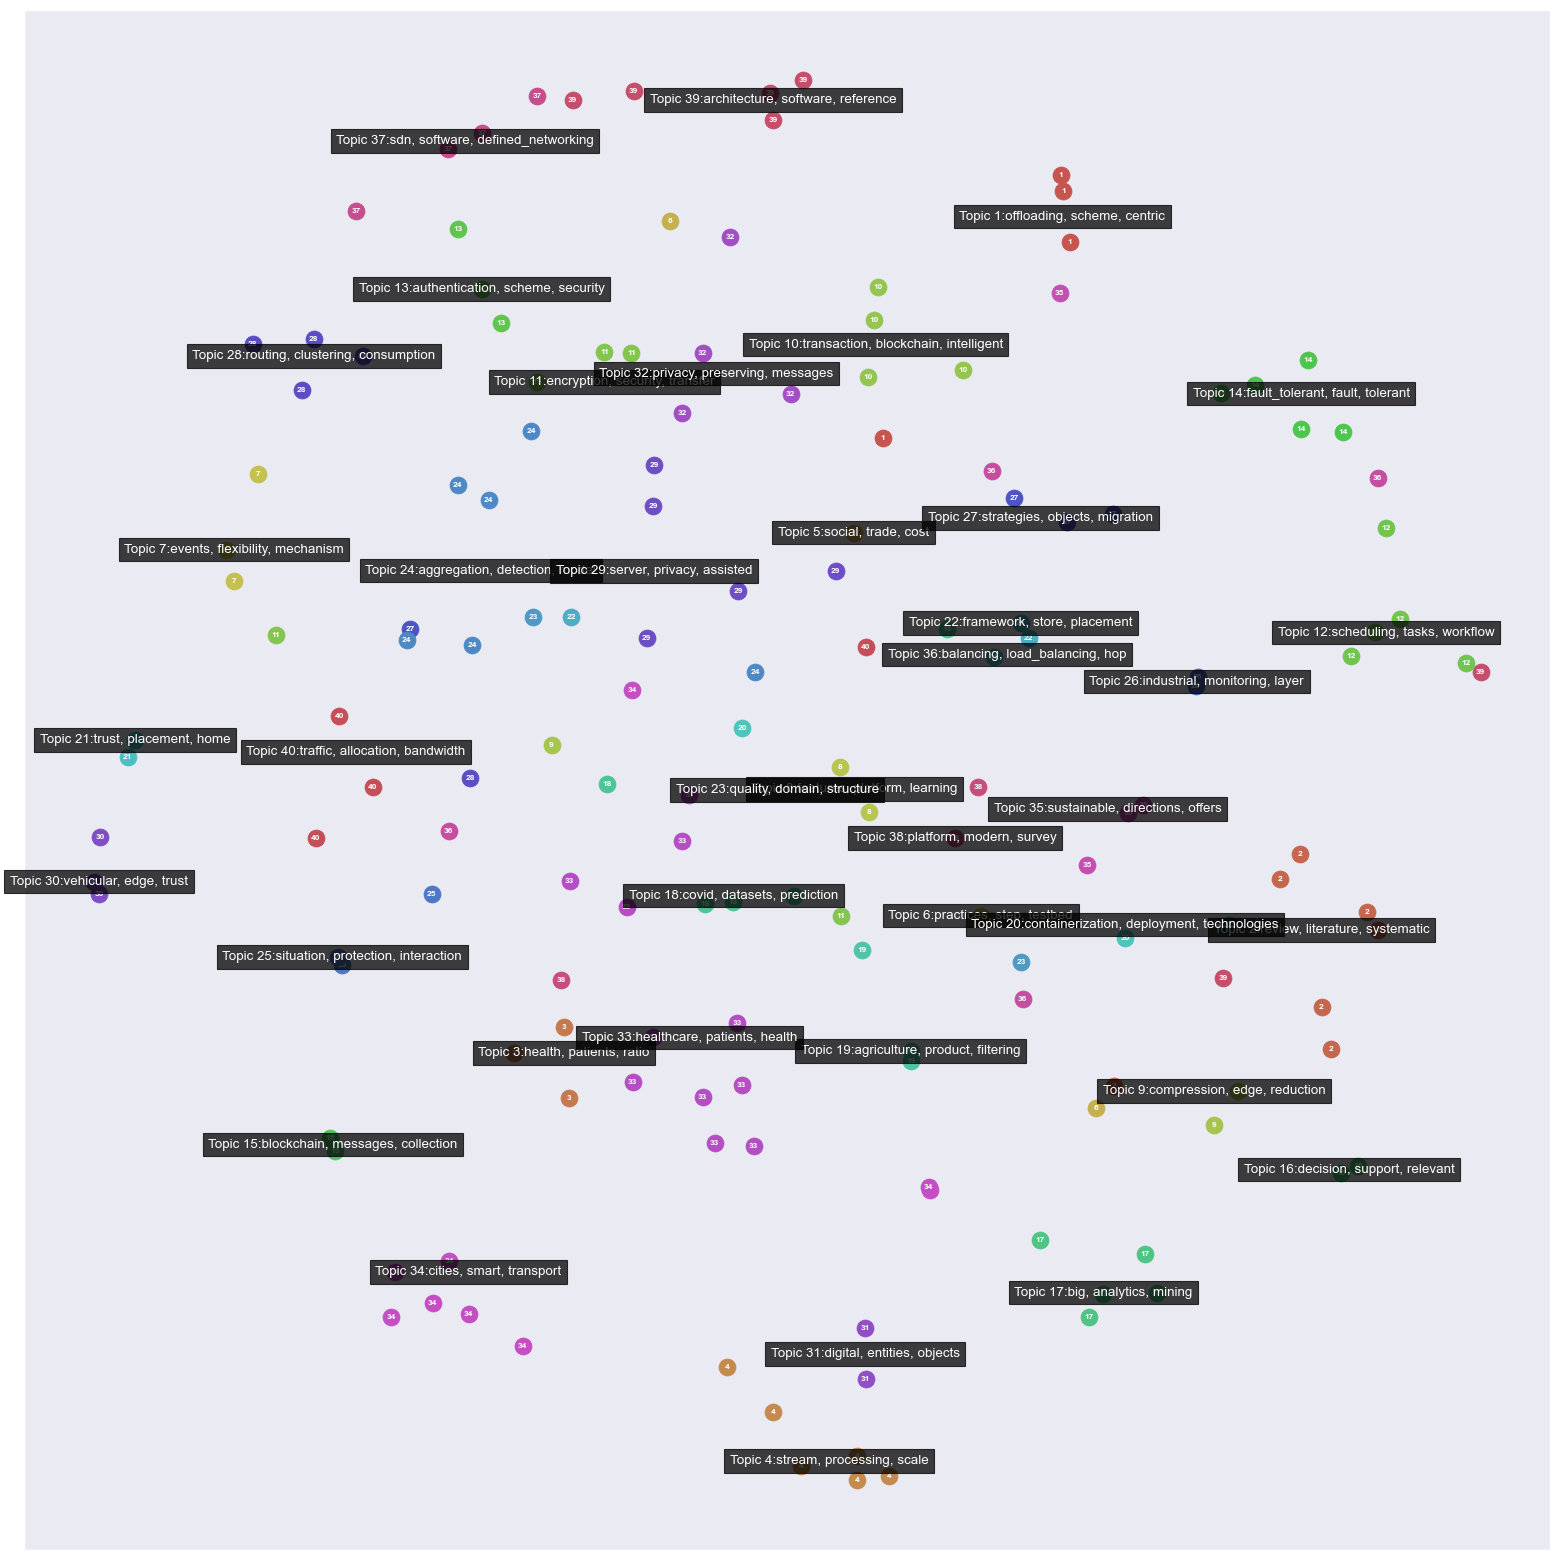

In [50]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);

In [51]:
topic_id = topic_model.best_topic_for_token('edge')

In [52]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
    print(docs[int(doc_id)].title)

Classical and quantum compression for edge computing: the ubiquitous data dimensionality reduction
An overview of data reduction solutions at the edge of IoT systems: a systematic mapping of the literature
Edge computing: current trends, research challenges and future directions
Edge-based personal computing services: fall detection as a pilot study
Edge Computing Technology Enablers: A Systematic Lecture Study
Edge computing: A grounded theory study
Edge-Computing-Enabled Smart Cities: A Comprehensive Survey
Fog computing: from architecture to edge computing and big data processing
A Cost-Aware Resource Management Technique for Cloud and Edge Environment
Edge Computing Based Applications in Vehicular Environments: Comparative Study and Main Issues


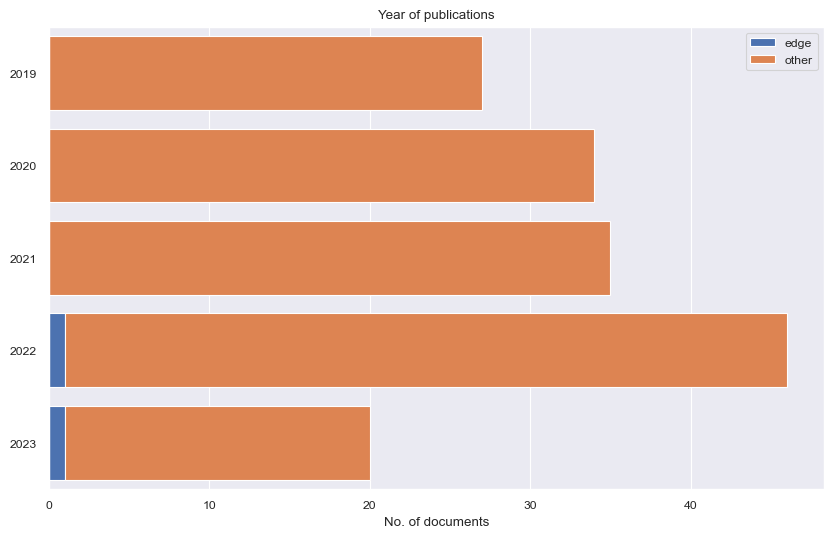

In [53]:
threshold = 0.2
dl_topic = topic_model.doc2topic[:, topic_id] > threshold

docs = docs.add_property('dl_topic', dl_topic)


groups = {
    'edge': 'dl_topic',
    'other': 'not dl_topic', 
}

litstudy.plot_year_histogram(docs, groups=groups, stacked=True);

In [40]:
table = litstudy.compute_year_histogram(docs, groups=groups)
table.div(table.sum(axis=1), axis=0) * 100

,edge,other
2019,7.407407,92.592593
2020,2.941176,97.058824
2021,2.857143,97.142857
2022,4.347826,95.652174
2023,5.000000,95.000000


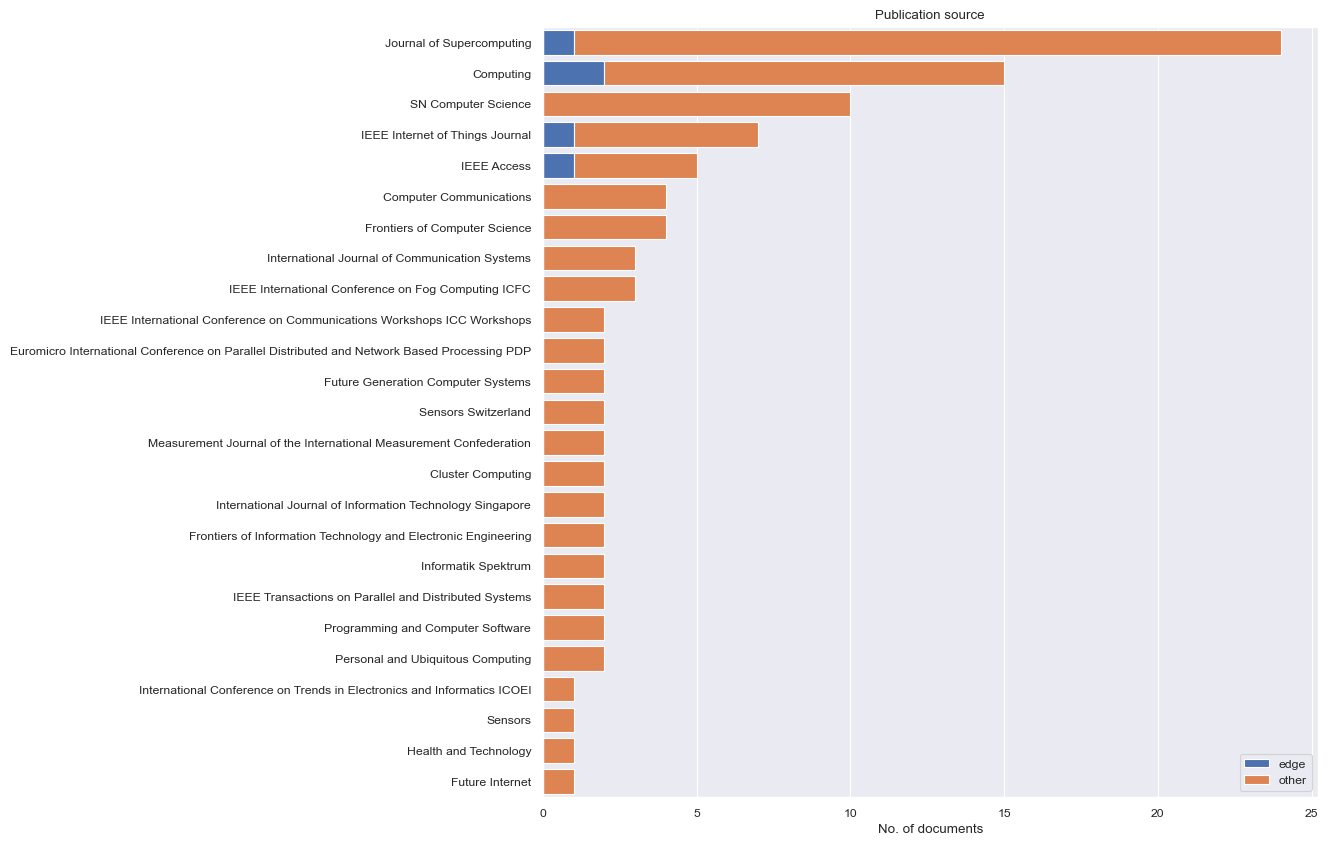

In [41]:
plt.figure(figsize=(10, 10))
litstudy.plot_source_histogram(docs, groups=groups, limit=25, stacked=True);

In [42]:
# Compute histogram by publication venue
table = litstudy.compute_source_histogram(docs, groups=groups)

# Add column 'total'
table['total'] = table['edge'] + table['other']

# Remove rare venues that have less than 5 publications
table = table[table['total'] >= 5]

# Add column 'ratio'
table['ratio'] = table['edge'] / table['total'] * 100

# Sort by ratio in descending order
table.sort_values(by='ratio', ascending=False)

,edge,other,total,ratio
IEEE Access,1,4,5,20.000000
IEEE Internet of Things Journal,1,6,7,14.285714
Computing,2,13,15,13.333333
Journal of Supercomputing,1,23,24,4.166667
SN Computer Science,0,10,10,0.000000
